###import data



In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

import cv2
from google.colab.patches import cv2_imshow
import matplotlib.image as img

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

In [ ]:
file_path = '/content/drive/MyDrive/AI/Final_Project'

In [ ]:
label = []
label = os.listdir(file_path)

img_path = []
for i in label:
  img_path.append(file_path + '/' + i)  

In [ ]:
df = pd.DataFrame(columns = ['img_path', 'label'])
df['img_path'] = img_path
df['label'] = label
df['label'] = df['label'].str.split('.').str[0]

In [ ]:
df.head()

,img_path,label
0,/content/drive/MyDrive/AI/Final_Project/268g2.png,268g2
1,/content/drive/MyDrive/AI/Final_Project/2fxgd.png,2fxgd
2,/content/drive/MyDrive/AI/Final_Project/2cegf.png,2cegf
3,/content/drive/MyDrive/AI/Final_Project/3bfnd.png,3bfnd
4,/content/drive/MyDrive/AI/Final_Project/34fxm.png,34fxm


In [ ]:
all_img = []

In [ ]:
for i, e in enumerate(df['img_path']):
  all_img.append(cv2.imread(e, 0))

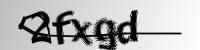

In [ ]:
cv2_imshow(all_img[1])

In [ ]:
dilated = []
for i in all_img:
  dilated.append(cv2.dilate(i, None, iterations=1))

In [ ]:
dilated

[array([[192, 192, 193, ..., 251, 251, 251],
        [192, 192, 193, ..., 251, 251, 251],
        [192, 192, 193, ..., 251, 251, 251],
        ...,
        [195, 195, 196, ..., 254, 254, 254],
        [195, 195, 196, ..., 254, 254, 254],
        [195, 195, 196, ..., 254, 254, 254]], dtype=uint8),
 array([[192, 192, 193, ..., 251, 251, 251],
        [192, 192, 193, ..., 251, 251, 251],
        [192, 192, 193, ..., 251, 251, 251],
        ...,
        [195, 195, 196, ..., 254, 254, 254],
        [195, 195, 196, ..., 254, 254, 254],
        [195, 195, 196, ..., 254, 254, 254]], dtype=uint8),
 array([[192, 192, 193, ..., 251, 251, 251],
        [192, 192, 193, ..., 251, 251, 251],
        [192, 192, 193, ..., 251, 251, 251],
        ...,
        [195, 195, 196, ..., 254, 254, 254],
        [195, 195, 196, ..., 254, 254, 254],
        [195, 195, 196, ..., 254, 254, 254]], dtype=uint8),
 array([[192, 192, 193, ..., 251, 251, 251],
        [192, 192, 193, ..., 251, 251, 251],
        [192, 19

In [ ]:
len(all_img)

1070

In [ ]:
X = []
y = []

for image in os.listdir(file_path) :
  
  img = cv2.imread(os.path.join(file_path, image), cv2.IMREAD_GRAYSCALE)

  img = cv2.medianBlur(img,5)
  gauss_pic = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
  
  image_list = [gauss_pic[10:50, 30:50], gauss_pic[10:50, 50:70], gauss_pic[10:50, 70:90], gauss_pic[10:50, 90:110], gauss_pic[10:50, 110:130]]
    
  for i in range(5) :
    X.append(img_to_array(Image.fromarray(image_list[i])))
    y.append(image[i])

X = np.array(X)
y = np.array(y)

In [ ]:
cv2_imshow(X[0])

In [ ]:
X.shape

(5350, 40, 20, 1)

In [ ]:
y[10]

'2'

In [ ]:
y.shape

(5350,)

In [ ]:
print(X.shape)
print(y.shape)

(5350, 40, 20, 1)
(5350,)


In [ ]:
X /= 255.0

In [ ]:
temp = set(y)
for t in temp :
    print('Occurance count of ' + t + ' : ' + str(len(y[y == t])))

Occurance count of g : 281
Occurance count of d : 269
Occurance count of e : 245
Occurance count of 6 : 267
Occurance count of f : 277
Occurance count of x : 271
Occurance count of 7 : 262
Occurance count of 2 : 270
Occurance count of b : 247
Occurance count of n : 540
Occurance count of p : 259
Occurance count of y : 240
Occurance count of 5 : 288
Occurance count of 4 : 289
Occurance count of m : 282
Occurance count of 3 : 271
Occurance count of c : 276
Occurance count of 8 : 272
Occurance count of w : 244


###encode

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

y_combine = LabelEncoder().fit_transform(y)
y_one_hot = OneHotEncoder(sparse = False).fit_transform(y_combine.reshape(len(y_combine),1))

In [ ]:
print('letter f : ' + str(y[2]))
print('label : ' + str(y_combine[2]))
print('Count : ' + str(len(y_combine[y_combine == y_combine[2]])))

letter f : 8
label : 6
Count : 272


In [ ]:
y_one_hot[1]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size = 0.2, random_state = 1)

In [ ]:
X[1]

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],


###prep

###Model 

In [ ]:
print(X_train.shape)
print(y_train.shape)

(4280, 40, 20, 1)
(4280, 19)


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization

from keras.layers import Dropout
from keras.layers import Input

In [ ]:
def conv_layer (filterx) :
    
    model = Sequential()
    
    model.add(Conv2D(filterx, (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
    
    return model

def dens_layer (hiddenx) :
    
    model = Sequential()
    
    model.add(Dense(hiddenx, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    return model

def cnn (filter1, filter2, filter3, hidden1, hidden2) :
    
    model = Sequential()
    model.add(Input((40, 20, 1,)))
    
    model.add(conv_layer(filter1))
    model.add(conv_layer(filter2))
    model.add(conv_layer(filter3))
    
    model.add(Flatten())
    model.add(dens_layer(hidden1))
    model.add(dens_layer(hidden2))
    
    model.add(Dense(19, activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [ ]:
model = cnn(128, 32, 16, 32, 32)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 20, 10, 128)       1792      
                                                                 
 sequential_8 (Sequential)   (None, 10, 5, 32)         37024     
                                                                 
 sequential_9 (Sequential)   (None, 5, 3, 16)          4688      
                                                                 
 flatten_1 (Flatten)         (None, 240)               0         
                                                                 
 sequential_10 (Sequential)  (None, 32)                7840      
                                                                 
 sequential_11 (Sequential)  (None, 32)                1184      
                                                                 
 dense_5 (Dense)             (None, 19)               

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('result_model.h5', monitor = 'val_loss', verbose = 0, save_best_only = True)

In [ ]:
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 0)

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 150, steps_per_epoch = len(X_train)/32, callbacks = [checkp])

Epoch 1/150
133/133 [==============================] - 3s 10ms/step - loss: 2.7403 - accuracy: 0.2037 - val_loss: 3.4112 - val_accuracy: 0.0533
Epoch 2/150
133/133 [==============================] - 1s 8ms/step - loss: 1.8354 - accuracy: 0.4727 - val_loss: 3.2326 - val_accuracy: 0.0935
Epoch 3/150
133/133 [==============================] - 1s 8ms/step - loss: 1.3784 - accuracy: 0.6220 - val_loss: 2.7014 - val_accuracy: 0.2131
Epoch 4/150
133/133 [==============================] - 1s 8ms/step - loss: 1.1187 - accuracy: 0.7035 - val_loss: 1.7204 - val_accuracy: 0.4888
Epoch 5/150
133/133 [==============================] - 1s 8ms/step - loss: 0.9336 - accuracy: 0.7486 - val_loss: 0.9280 - val_accuracy: 0.7720
Epoch 6/150
133/133 [==============================] - 1s 8ms/step - loss: 0.8116 - accuracy: 0.7785 - val_loss: 0.6299 - val_accuracy: 0.8430
Epoch 7/150
133/133 [==============================] - 1s 8ms/step - loss: 0.7616 - accuracy: 0.7916 - val_loss: 0.5461 - val_accuracy: 0.862

Text(0.5, 1.0, 'Model accuracy wrt Epoch')

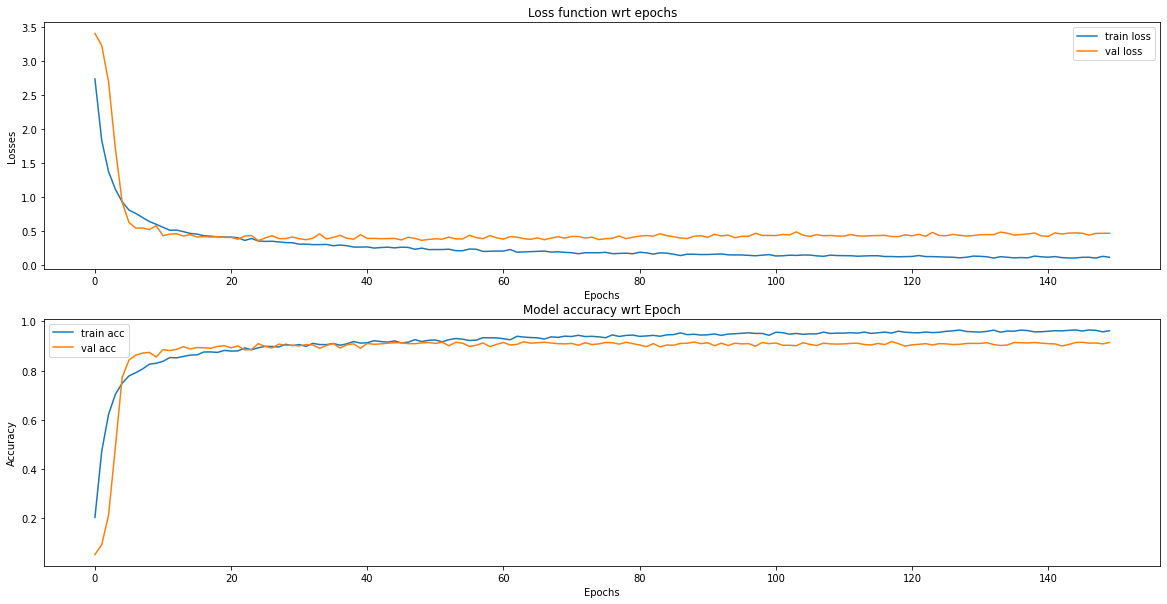

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['train loss','val loss'])
plt.title('Loss function wrt epochs')

plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train acc' , 'val acc'])
plt.title('Model accuracy wrt Epoch')

In [ ]:
from keras.models import load_model
model = load_model('result_model.h5')
pred = model.predict(X_test)

34/34 [==============================] - 0s 2ms/step


In [ ]:
pred = np.argmax(pred, axis = 1)
yres = np.argmax(y_test,axis= 1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
info = {y_combine[i] : y[i] for i in range(len(y))}

In [ ]:
target_name = []
for i in sorted(info) :
    target_name.append(info[i])
target_name

['2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y']

In [ ]:
def compute_perf_metric(predictions, groundtruth):
    if predictions.shape == groundtruth.shape:
        return np.sum(predictions == groundtruth)/(predictions.shape[0]*predictions.shape[1])
    else:
        raise Exception('Error : the size of the arrays do not match. Cannot compute the performance metric')

In [ ]:
yres.shape

(1070,)

In [ ]:
pred.shape

(1070,)

In [ ]:
compute_perf_metric(pred, yres)

IndexError: ignored

In [ ]:
print('Accuracy : ' + str(accuracy_score(yres, pred)))
print(classification_report(yres, pred, target_names = target_name))

Accuracy : 0.9093457943925234
              precision    recall  f1-score   support

           2       0.95      0.97      0.96        61
           3       0.98      0.96      0.97        51
           4       0.99      1.00      0.99        66
           5       0.97      0.91      0.94        67
           6       0.95      0.87      0.91        47
           7       0.91      0.91      0.91        57
           8       0.93      0.98      0.95        43
           b       0.94      0.96      0.95        51
           c       0.75      0.91      0.82        56
           d       0.86      0.83      0.84        58
           e       0.97      0.95      0.96        37
           f       0.89      0.96      0.93        52
           g       1.00      0.95      0.98        66
           m       0.83      0.50      0.62        58
           n       0.76      0.95      0.85       111
           p       0.96      0.93      0.95        46
           w       0.96      0.96      0.96        

In [ ]:
def get_demo (img_path) :
    
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.show()
    
    image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

    i = 0
    for i in range(5) :
      plt.subplot(1, 5, i+1)
      plt.imshow(image_list[i])

    Xdemo = []
    for i in range(5) :
        Xdemo.append(img_to_array(Image.fromarray(image_list[i])))
    
    Xdemo = np.array(Xdemo)
    Xdemo/= 255.0
    
    ydemo = model.predict(Xdemo)
    ydemo = np.argmax(ydemo, axis = 1)
    
    for res in ydemo :
        print(info[res])
    print(img_path[-9:])

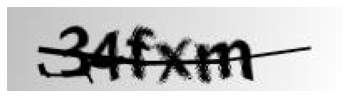

1/1 [==============================] - 0s 18ms/step
3
4
f
x
n
34fxm.png


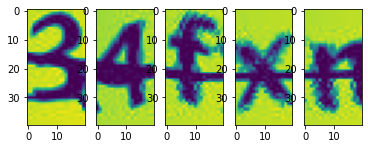

In [ ]:
get_demo('/content/drive/MyDrive/AI/Final_Project/34fxm.png')

In [ ]:
,